In [1]:
# stacked generalization with linear meta model on blobs dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#x_train  y_train to train
#x_test   y_test to test
#x_valid  y_valid 
#video
import joblib
x_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert7/test/pred_test')
x_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert7/train/pred_train')
x_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/video/data_set/expert7/valid/pred_valid')
y_test = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/test/labels_test')
y_train = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/train/labels_train')
y_valid = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/valid/labels_valid')
#audio

x_audio_test_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/test/predict_test')
x_audio_train_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/train/predict_train')
x_audio_valid_prediction = joblib.load('/content/drive/My Drive/fusion/savee/audio/data_set/expert7/valid/predict_valid')
"""
#samples name
test_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')
train_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')
valid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')
"""

"\n#samples name\ntest_videos= joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/test/video_test_path')\ntrain_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/train/video_train_path')\nvalid_videos = joblib.load('/content/drive/My Drive/fusion/video/data_set_fusion/expert1/valid/video_valid_path')\n"

In [4]:
len(x_test_prediction),len(x_train_prediction),len(x_audio_test_prediction),len(x_audio_train_prediction),len(x_valid_prediction),len(x_audio_valid_prediction)

(36, 288, 36, 288, 36, 36)

In [5]:
#x_train for video
x_train_prediction=x_train_prediction.append(x_valid_prediction,ignore_index = True)
#x_train for audio
x_audio_train_prediction=x_audio_train_prediction.append(x_audio_valid_prediction,ignore_index = True)

In [6]:
len(x_audio_train_prediction),len(x_train_prediction)

(324, 324)

In [7]:
from pandas.core.frame import DataFrame
df_train=DataFrame(y_train,columns=['labels'])
df_valid=DataFrame(y_valid,columns=['labels'])

In [8]:
df_train=df_train.append(df_valid,ignore_index = True)

In [9]:
len(df_train)

324

In [10]:
df_train

,labels
0,3
1,2
2,1
3,1
4,3
...,...
319,0
320,2
321,4
322,2


In [11]:
import pandas as pd

x_train = pd.concat([x_train_prediction, x_audio_train_prediction], axis=1,join='inner')
x_test =  pd.concat([x_test_prediction, x_audio_test_prediction], axis=1,join='inner')

In [12]:
x_test

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000043,0.000113,0.001302,0.000015,0.998528,9.010527e-07,1.329614e-05,5.277129e-07,7.645064e-05,9.999088e-01
1,0.001322,0.000065,0.002526,0.995987,0.000101,9.354159e-05,2.395691e-05,2.197155e-04,9.993793e-01,2.835369e-04
2,0.999664,0.000024,0.000178,0.000114,0.000021,9.999940e-01,5.248828e-07,2.731245e-06,2.535043e-06,2.863219e-07
3,0.000121,0.000163,0.000196,0.999499,0.000022,4.520511e-04,3.819120e-04,6.396094e-05,9.952602e-01,3.841894e-03
4,0.000268,0.000037,0.998636,0.000386,0.000673,4.115710e-07,3.862086e-10,9.999952e-01,2.747533e-07,4.139094e-06
5,0.000082,0.997350,0.000817,0.000353,0.001398,2.266245e-06,1.356207e-01,7.760477e-05,8.642970e-01,2.437962e-06
6,0.000083,0.996715,0.000517,0.000122,0.002563,4.284305e-09,9.999955e-01,1.417365e-08,9.986405e-08,4.442222e-06
7,0.999479,0.000030,0.000283,0.000179,0.000029,9.999847e-01,1.961513e-06,1.726600e-07,1.236694e-05,8.880265e-07
8,0.999727,0.000026,0.000134,0.000097,0.000017,9.998596e-01,1.678603e-08,1.403104e-04,3.533206e-08,8.360327e-08
9,0.999741,0.000036,0.000115,0.000095,0.000013,9.999948e-01,1.302809e-12,1.894494e-09,5.225071e-06,1.536233e-11


In [13]:
len(x_test),len(x_train)

(36, 324)

In [14]:
x_train

,OV_0,OV_1,OV_2,OV_3,OV_4,OA_0,OA_1,OA_2,OA_3,OA_4
0,0.000608,0.000081,0.000531,0.998754,0.000026,4.074196e-05,1.574245e-04,1.270313e-09,9.998003e-01,1.542198e-06
1,0.000285,0.000041,0.998562,0.000370,0.000742,1.871561e-02,4.455323e-07,9.797512e-01,2.438339e-04,1.288967e-03
2,0.000061,0.997591,0.000573,0.000130,0.001644,4.269006e-07,9.999601e-01,5.491080e-06,3.234833e-05,1.660757e-06
3,0.000161,0.987064,0.000545,0.000128,0.012102,1.234665e-08,9.999311e-01,1.337162e-08,3.851797e-10,6.891891e-05
4,0.000173,0.000073,0.000260,0.999474,0.000019,1.034032e-05,5.008652e-04,1.331672e-05,9.994739e-01,1.494447e-06
...,...,...,...,...,...,...,...,...,...,...
319,0.999389,0.000033,0.000337,0.000210,0.000031,9.083124e-01,1.064800e-06,8.597389e-02,1.040552e-06,5.711664e-03
320,0.000317,0.000043,0.998240,0.000361,0.001039,4.056541e-01,7.288647e-04,5.663630e-01,2.680960e-02,4.443639e-04
321,0.000034,0.000110,0.001509,0.000015,0.998333,6.421166e-06,1.182146e-03,1.939632e-07,9.950170e-01,3.794239e-03
322,0.000288,0.000022,0.997893,0.000385,0.001412,6.996325e-02,4.300291e-06,9.300245e-01,3.569636e-09,8.024452e-06


In [15]:
from sklearn.utils import shuffle
seed=42
new_x_train = shuffle(x_train,random_state=seed)
new_y_train = shuffle(df_train,random_state=seed)
new_x_train = new_x_train.reset_index(drop=True)
new_y_train = new_y_train.reset_index(drop=True)
"""
y_train=df_train.to_numpy()
y_train=y_train.reshape(1860,)
y_train, y_train.shape
"""

'\ny_train=df_train.to_numpy()\ny_train=y_train.reshape(1860,)\ny_train, y_train.shape\n'

In [16]:
len(new_y_train)

324

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
new_x_train = scaler.fit_transform(new_x_train)
X_test = scaler.transform(x_test)

In [18]:
y_train=df_train.to_numpy()
y_train=y_train.reshape(324,)
y_train, y_train.shape

(array([3, 2, 1, 1, 3, 0, 0, 2, 4, 4, 1, 3, 4, 2, 0, 0, 0, 3, 3, 0, 1, 1,
        3, 1, 0, 2, 1, 1, 1, 0, 0, 4, 3, 1, 3, 1, 0, 1, 1, 3, 4, 3, 3, 0,
        3, 0, 0, 0, 3, 0, 2, 4, 4, 4, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 3, 3, 0, 2, 0, 4, 0, 0, 2, 1, 2, 4, 2, 3, 1, 3, 3, 3, 4, 1,
        4, 4, 2, 1, 4, 1, 0, 2, 3, 0, 0, 0, 0, 1, 3, 0, 1, 3, 3, 3, 4, 2,
        2, 0, 3, 3, 1, 0, 0, 0, 4, 0, 3, 1, 4, 2, 1, 2, 4, 1, 3, 4, 3, 0,
        2, 0, 3, 0, 3, 1, 2, 2, 0, 2, 0, 1, 2, 3, 1, 0, 1, 0, 0, 0, 0, 3,
        3, 3, 2, 2, 2, 4, 3, 0, 2, 3, 0, 1, 0, 0, 2, 0, 2, 0, 0, 1, 0, 1,
        1, 2, 2, 4, 3, 1, 4, 0, 2, 0, 2, 3, 2, 0, 4, 1, 3, 0, 4, 0, 4, 0,
        0, 3, 1, 3, 3, 3, 0, 0, 2, 0, 4, 3, 3, 1, 4, 3, 4, 0, 4, 1, 4, 2,
        2, 4, 4, 0, 0, 0, 1, 2, 0, 4, 4, 1, 2, 2, 3, 2, 0, 2, 0, 0, 0, 3,
        1, 2, 4, 4, 2, 4, 0, 1, 4, 4, 1, 2, 4, 0, 1, 4, 0, 0, 0, 1, 0, 2,
        3, 4, 0, 4, 2, 0, 3, 4, 2, 0, 1, 0, 0, 0, 4, 0, 0, 2, 0, 0, 4, 4,
        2, 3, 0, 0, 0, 2, 0, 0, 2, 3, 

# training machine learning

In [19]:

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np

clf = MLPClassifier(hidden_layer_sizes=(40,),random_state=42, max_iter=500).fit(new_x_train, new_y_train)
predictions = clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [20]:
predictions

array([4, 3, 0, 3, 2, 1, 1, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 1, 1, 2, 1, 0,
       3, 0, 0, 3, 3, 2, 1, 4, 1, 4, 3, 1, 2, 2])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         4

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

----accuracy score 100.0 ----


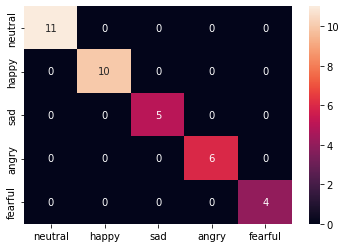

In [21]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn
import matplotlib.pyplot as plt

print(classification_report(y_test,predictions))

acc = float(accuracy_score(y_test,predictions))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,predictions)
#df_cm = pd.DataFrame(cm)
class_names = ['neutral','happy','sad','angry', 'fearful' ]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names,)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

In [24]:
path='/content/drive/My Drive/fusion/savee_fusion_model/MLP/expert7'
savedvX = joblib.dump(clf, path)

print("MODEL SAVED")

MODEL SAVED
